# INTRODUTION<BR>
DOMAIN : DATA SCIENCE<BR>
TASK : 4<BR>
AIM : SALES PREDICTION USING PYTHON<BR>

# STEPS <br>
1. DEFINE THE PROBLEM STATEMENT <br>
2. COLLECT THE DATA <br>
3. EXPLORE AND CLEAN THE DATA <br>
4. FEATURE ENGINEERING <br>
5. SPLIT THE DATA <br>
6. CHOOSE A MODEL  <br> 
7. EVALUATE THE MODEL <br>
8. TUNE THE MODEL <br>
9. TUNE HYPERPARAMETERS<br>
10. MAKE PREDICTIONS<br>
11. INTERUPT RESULTS<br>
12. DEPLOY THE MODEL<br>
13. MONITOR AND UPDATE THE MODEL<br>

STEP 1 : 
PROBLEM STATEMENT : 
The purpose is to forecast future product sales by examining past sales data and different affecting factors such as advertising budget, target audience segmentation, and advertising platform selection. By precisely estimating future sales, the company hopes to enhance its advertising methods and deploy resources more efficiently, maximizing sales potential. This entails developing a prediction model in Python using machine learning techniques that can account for these variables and give accurate sales estimates.

In [1]:
#STEP 2 : COLLECT THE DATA..
import pandas as pd
sd = pd.read_csv('advertising.csv')
sd

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]

In [2]:
#STEP : 3 
#EXPLORE AND CLEAN THE DATA IF NEEDED

print(sd.head())
print(sd.info())
print(sd.describe())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000

In [3]:
sd.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Since the data is clear we can use it

In [5]:
from sklearn.model_selection import train_test_split

# STEP 4:
X = sd.drop(['Sales'], axis=1)
y = sd['Sales']

# STEP 5:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#STEP 6 : CHOOSE THE MODEL
from sklearn.ensemble import RandomForestRegressor

#STEP 7 : TRAIN THE MODEL
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
#STEP 8 : EVALUATE THE MODEL: 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('MEAN ABSOLUTE ERROR :',mae)
print('MEAN SQUARED ERROR : ',mse)
print('R2_SCORE : ',r2)

MEAN ABSOLUTE ERROR : 0.9179999999999993
MEAN SQUARED ERROR :  1.4374328500000009
R2_SCORE :  0.9534827934927883


In [10]:
#STEP 9 : TUNE HYPERPARAMETERS

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [12]:
#STEP 10 : MAKE PREDICTIONS
predictions = best_model.predict(sd.drop(['Sales'], axis=1))

In [13]:
print(predictions)

[22.03693056 10.66516667 10.14233333 16.62683333 17.78296984  7.29733333
 11.47517677 12.99277612  4.75933333 16.62342222 11.47940317 17.52787832
  9.139      13.09500228 18.87128981 22.481      13.313      23.74333333
 11.16705697 14.42966178 18.30173757 17.42816561  5.8905     20.36847077
  9.94262121 17.17872593 14.92114286 20.58438902 19.22974859 10.68911592
 19.83811746 12.07892811 12.48228266 18.5760627  12.21386684 17.74066667
 25.279      14.408      10.10588095 21.58271843 17.48417109 17.20340185
 20.28314008 17.86779735  8.3585     16.8558404  11.03445197 22.96466667
 19.8180254  10.20228413 16.59980556 11.61132467 22.50985714 21.16
 19.96137082 22.99333333  6.51833333 13.18273326 23.277      18.38386549
  9.9334697  24.58066667 20.38362235 14.09194589 15.82688889 11.09129911
  7.53533333 12.51996659 19.81130812 22.73133333 18.36394259 12.13048076
  8.8225     11.40906098 17.35536555  9.949       7.47166667 14.29626659
  4.944      11.29826556 11.96190186 17.32222513 11.60599

STEP 11 : ANALYZE THE RESULTS AND DERIVE INSIGHTS.
VISUALIZE PREDICITONS VERSUS ACTUAL SALES USING PLOTS

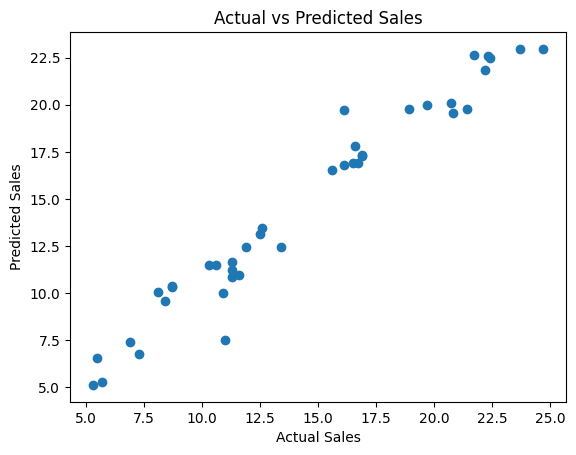

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

STEP 12 : DEPLOY THE MODEL:
Once satisfied with the model's performance, we can deploy it in a production enviornment where it csn be used to make real-time sales predictions.

Step 13: Monitor and Update the Model
Continuously monitor the model's performance and update it with new data to ensure it remains accurate and relevant.

Following these steps, you can develop a robust sales prediction model using machine learning in Python.